In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [3]:
data = pd.read_csv("/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_shifted.csv")

data = data.dropna(axis=0, subset=['fut1fire'])

data2 = pd.read_csv('/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_years.csv')

data2 = data2.dropna(axis=0, subset=['fut1fire'])

data2 = data2.dropna(axis=0, subset=['36MoFires'])

In [4]:
#data = data[pd.to_datetime(data['Date']).dt.strftime('%B') == 'June']
#data2 = data2[pd.to_datetime(data2['Date']).dt.strftime('%B') == 'June']

data2 = data2.sort_values(["Date", "newID"])
data2

,newID,Date,YYYYMM,Year,VPD,PPT,TMAX,left,top,HubDist,...,2Mo_PPT,3Mo_PPT,12MoMeanVPD,12MoMeanTMAX,12MoMeanPPT,Month,Fire,fut1fire,fut2fire,fut3fire
36,1,2002-01-01,200201,2002,4.283429,350.124429,11.391571,-124.301341,42.055424,3658.694708,...,14.109857,17.405143,6.335667,15.226559,137.125548,0.0,0,0.0,0.0,0.0
313,2,2002-01-01,200201,2002,3.826500,400.322505,10.289834,-124.201341,42.055424,4926.625172,...,13.638500,20.400333,9.725583,17.123194,147.513195,0.0,0,0.0,0.0,0.0
590,3,2002-01-01,200201,2002,3.453833,432.551997,9.616500,-124.101341,42.055424,11649.734645,...,13.258000,21.137000,11.526361,17.932514,156.439597,0.0,0,0.0,0.0,0.0
867,4,2002-01-01,200201,2002,4.441556,491.909336,8.627889,-124.001341,42.055424,17830.887457,...,12.341111,20.358889,14.074556,18.259870,180.370926,0.0,0,0.0,0.0,0.0
1144,5,2002-01-01,200201,2002,4.626500,519.459508,7.754333,-123.901341,42.055424,9621.080189,...,11.172667,19.092667,13.839278,17.358403,191.672485,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216859,4512,2021-12-01,202112,2021,19.652550,10.393700,21.511600,-115.701341,32.655424,8199.756390,...,31.235800,39.572899,41.707737,31.771062,3.247512,-0.5,0,0.0,NaN,NaN
1217136,4514,2021-12-01,202112,2021,7.788333,78.411265,16.261600,-117.201341,32.555424,9302.807544,...,21.818099,22.083633,10.107128,19.995158,12.918264,-0.5,0,0.0,NaN,NaN
1217413,4515,2021-12-01,202112,2021,8.986200,85.628124,16.767900,-117.101341,32.555424,4558.517518,...,23.552724,23.592050,12.647156,20.955750,14.092894,-0.5,0,0.0,NaN,NaN
1217690,4516,2021-12-01,202112,2021,9.966675,88.875797,17.117199,-117.001341,32.555424,5109.923928,...,24.445049,26.479399,15.948952,22.572979,14.055881,-0.5,0,0.0,NaN,NaN


In [18]:
import numpy as np

final_pred_data = pd.read_csv('/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_3mofwd.csv')

final_pred_data = final_pred_data[(pd.to_datetime(final_pred_data['Date']).dt.strftime('%Y') == '2021')]

pred_array = final_pred_data.values

X_pred = pred_array[:,3:]

X_pred = X_pred.astype('float')

In [19]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

out = np.concatenate((X_pred[:,3:5], X_pred[:,-4:-3]), axis=1)

out_df = pd.DataFrame(out)

out_df

out_df.columns = out_df.columns.astype(str)

geometry = [Point(xy) for xy in zip(out_df["0"], out_df["1"])]

geo_poly = []

t = [[0, 0], [0, 0.1], [0.1, 0.1], [0.1, 0]]

for point in geometry:
    tmp = []
    for i in t:
        tmp.append([point.x + i[0], point.y + i[1]])
    
    geo_poly.append(Polygon(tmp))

In [20]:
geo_df = gpd.GeoDataFrame(out_df, crs='epsg:4326', geometry=geo_poly)

geo_df

,0,1,2,geometry
0,-124.301341,42.055424,0.0,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
1,-124.301341,42.055424,0.0,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
2,-124.301341,42.055424,0.0,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
3,-124.301341,42.055424,0.0,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
4,-124.301341,42.055424,0.0,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
...,...,...,...,...
52759,-116.901341,32.555424,0.0,"POLYGON ((-116.90134 32.55542, -116.90134 32.6..."
52760,-116.901341,32.555424,0.0,"POLYGON ((-116.90134 32.55542, -116.90134 32.6..."
52761,-116.901341,32.555424,0.0,"POLYGON ((-116.90134 32.55542, -116.90134 32.6..."
52762,-116.901341,32.555424,0.0,"POLYGON ((-116.90134 32.55542, -116.90134 32.6..."


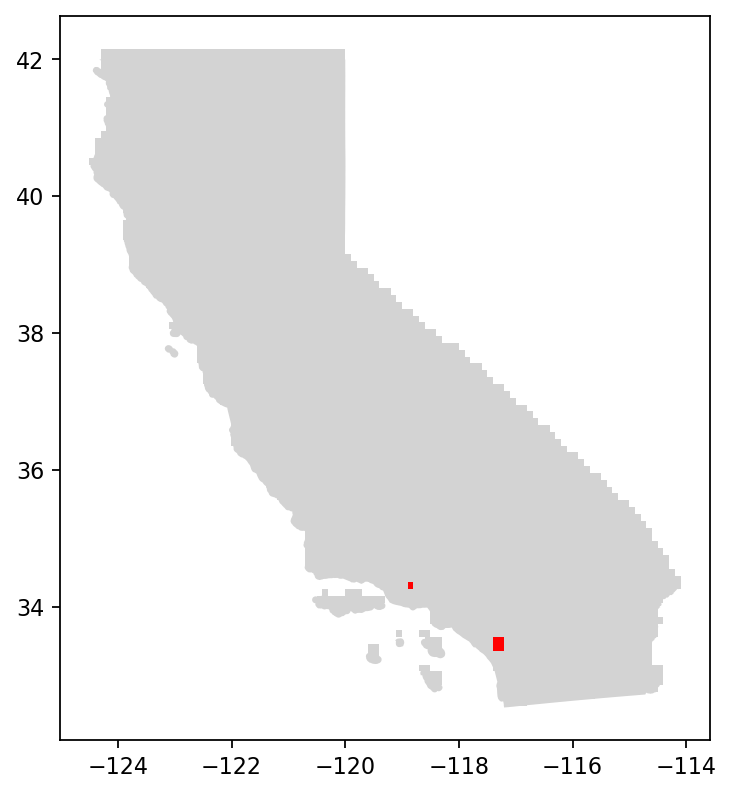

In [23]:
import geopandas as gpd
import matplotlib

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6), dpi=160)
# plot map on axis
state = gpd.read_file("/Users/alekseyvalouev/Desktop/FireData/California_SHP/CA_State_TIGER2016.shp")
state = state.to_crs(epsg=4326)
state[state["NAME"] == "California"].plot(color="lightgrey", ax=ax)

fire_df = geo_df.loc[geo_df['2'] == 1.0]

Reds = plt.get_cmap('Oranges')

geo_df.plot(color='lightgrey', ax = ax)
fire_df.plot(color='red', ax = ax)

#fig.colorbar(matplotlib.cm.ScalarMappable(norm=norms, cmap=Reds), orientation='vertical', label='Score')


plt.show()